# 📝 Exercise M4.01

The aim of this exercise is two-fold:

* understand the parametrization of a linear model;
* quantify the fitting accuracy of a set of such models.

We will reuse part of the code of the course to:

* load data;
* create the function representing a linear model.

## Prerequisites

### Data loading

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

### Model definition

In [2]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

## Main exercise

Define a vector `weights = [...]` and a vector `intercepts = [...]` of
the same length. Each pair of entries `(weights[i], intercepts[i])` tags a
different model. Use these vectors along with the vector
`flipper_length_range` to plot several linear models that could possibly
fit our data. Use the above helper function to visualize both the models and
the real samples.

In [3]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
flipper_length_range

array([[172.        ],
       [172.19732441],
       [172.39464883],
       [172.59197324],
       [172.78929766],
       [172.98662207],
       [173.18394649],
       [173.3812709 ],
       [173.57859532],
       [173.77591973],
       [173.97324415],
       [174.17056856],
       [174.36789298],
       [174.56521739],
       [174.76254181],
       [174.95986622],
       [175.15719064],
       [175.35451505],
       [175.55183946],
       [175.74916388],
       [175.94648829],
       [176.14381271],
       [176.34113712],
       [176.53846154],
       [176.73578595],
       [176.93311037],
       [177.13043478],
       [177.3277592 ],
       [177.52508361],
       [177.72240803],
       [177.91973244],
       [178.11705686],
       [178.31438127],
       [178.51170569],
       [178.7090301 ],
       [178.90635452],
       [179.10367893],
       [179.30100334],
       [179.49832776],
       [179.69565217],
       [179.89297659],
       [180.090301  ],
       [180.28762542],
       [180

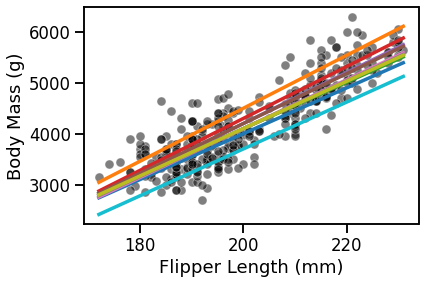

In [34]:
import seaborn as sns

weights = [45, 52, 45.5, 51, 50, 49, 48, 47, 46.5,  46]
intercepts = [-5000, -5900, -5000, -5900, -5800, -5600, -5500, -5300, -5200, -5500]
# predicted_body_mass = linear_model_flipper_mass(
#     flipper_length_range, weight_flipper_length, intercept_body_mass)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)

for i in range(len(weights)):
    predicted_body_mass = linear_model_flipper_mass(flipper_length_range, weights[i], intercepts[i])
    ax.plot(flipper_length_range, predicted_body_mass)
    
# _ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

In the previous question, you were asked to create several linear models.
The visualization allowed you to qualitatively assess if a model was better
than another.

Now, you should come up with a quantitative measure which indicates the
goodness of fit of each linear model and allows you to select the best model.
Define a function `goodness_fit_measure(true_values, predictions)` that takes
as inputs the true target values and the predictions and returns a single
scalar as output.

In [76]:
# My answer:
from math import sqrt
def goodness_fit_measure(true_values, predictions):
    sum_of_squares = 0
    for i in range(len(true_values)):
        delta_square = (predictions.values[i][0] - true_values[i]) ** 2
        # print(predictions.values[i][0])
        # print(true_values[i])
        sum_of_squares += delta_square
    return sqrt(sum_of_squares / len(true_values))

In [73]:
# solution
def goodness_fit_measure(true_values, predictions):
    # we compute the error between the true values and the predictions of our
    # model
    errors = np.ravel(true_values) - np.ravel(predictions)
    # We have several possible strategies to reduce all errors to a single value.
    # Computing the mean error (sum divided by the number of element) might seem
    # like a good solution. However, we have negative errors that will misleadingly
    # reduce the mean error. Therefore, we can either square each
    # error or take the absolute value: these metrics are known as mean
    # squared error (MSE) and mean absolute error (MAE). Let's use the MAE here
    # as an example.
    return np.mean(np.abs(errors))

You can now copy and paste the code below to show the goodness of fit for
each model.

```python
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")
```

In [79]:
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(type(target_predicted))
    print(type(target))

    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Model #0:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 429.718

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Model #1:
52.00 (g / mm) * flipper length + -5900.00 (g)
Error: 524.600

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Model #2:
45.50 (g / mm) * flipper length + -5000.00 (g)
Error: 402.012

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Model #3:
51.00 (g / mm) * flipper length + -5900.00 (g)
Error: 419.391

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Model #4:
50.00 (g / mm) * flipper length + -5800.00 (g)
Error: 395.604

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Model #5:
49.00 (g / mm) * flipper length + -5600.00 (g)
Error: 395.595

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Model #6:
48.00 (g / mm) * flipper length + 